In [1]:
"""
Note book looking at total building occupations across all cities to find a general overview of all buildings we are dealing with. Important note is that I sum across spaces within building
"""

'\nNote book looking at total building occupations across all cities to find a general overview of all buildings we are dealing with. Important note is that I sum across spaces within building\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read parquet
df_occ_full = pd.read_parquet("occupancy_new_metric.parquet")

In [3]:
# Work with weeks days only to capture real trends
week_ends = pd.to_datetime(["2023-03-05", "2023-03-11"])
df_occ = df_occ_full[~df_occ_full["date_daily"].isin(week_ends)].copy() # Removes weekends
df_occ["date_daily"].unique()

<DatetimeArray>
['2023-03-06 00:00:00', '2023-03-07 00:00:00', '2023-03-08 00:00:00',
 '2023-03-09 00:00:00', '2023-03-10 00:00:00']
Length: 5, dtype: datetime64[ns]

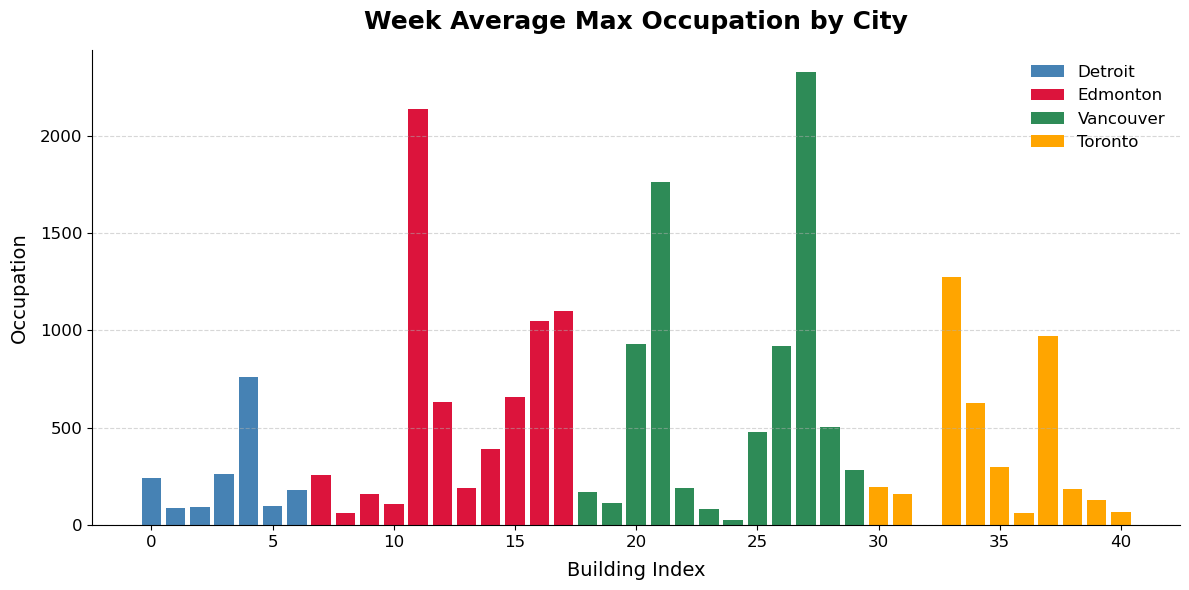

In [4]:
# Get average max occupation per day
max_occ_time = df_occ.loc[df_occ.groupby(["city","building_name","space_name","date_daily"])["avg_occ"].idxmax(), 
       ["city","building_name","date_time","space_name","avg_occ"]].reset_index(drop=True)

# Average per day
mean_occ_space =(     
    max_occ_time
    .groupby(["city", "building_name","space_name"])["avg_occ"]
    .mean()
    .reset_index()
)

# Sum across all spaces
city_building_occ =(     
    mean_occ_space
    .groupby(["city", "building_name"])["avg_occ"]
    .sum()
    .reset_index()
)

# Visualzing building occupation by city
detroit_occ = np.array(city_building_occ[(city_building_occ["city"] == "Detroit")].reset_index(drop=True)["avg_occ"].astype(int)) 
edmonton_occ = np.array(city_building_occ[(city_building_occ["city"] == "Edmonton")].reset_index(drop=True)["avg_occ"].astype(int))
vancouver_occ = np.array(city_building_occ[(city_building_occ["city"] == "Vancouver")].reset_index(drop=True)["avg_occ"].astype(int))
toronto_occ = np.array(city_building_occ[(city_building_occ["city"] == "Toronto")].reset_index(drop=True)["avg_occ"].astype(int)) 
# Concatenate all into one sequence
all_data = np.concatenate([detroit_occ, edmonton_occ, vancouver_occ, toronto_occ])
# Category boundaries
lengths = [len(detroit_occ), len(edmonton_occ), len(vancouver_occ), len(toronto_occ)]
labels  = ["Detroit", "Edmonton", "Vancouver", "Toronto"]
colors  = ["steelblue", "crimson", "seagreen", "orange"]

# Base x positions
x = np.arange(len(all_data))

plt.figure(figsize=(12,6))

# Plot each block with its color
start = 0
for length, label, color in zip(lengths, labels, colors):
    end = start + length
    plt.bar(x[start:end], all_data[start:end], color=color, label=label)
    start = end

# Titles & labels
plt.title("Week Average Max Occupation by City", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Building Index", fontsize=14, labelpad=8)
plt.ylabel("Occupation", fontsize=14, labelpad=8)

# Grid & style
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.show()

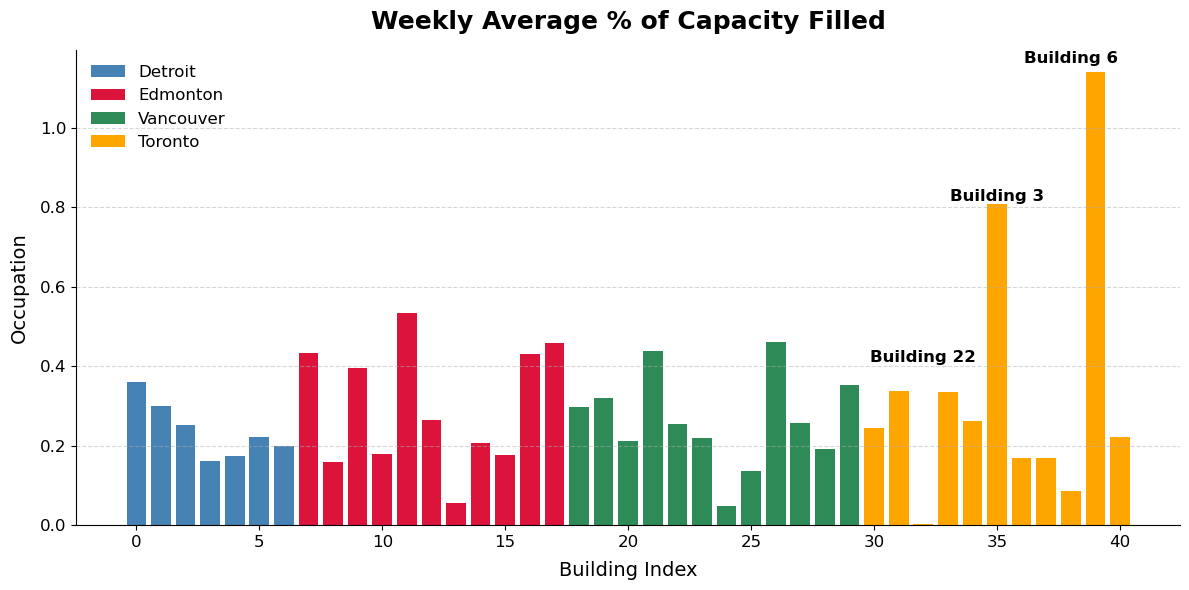

In [5]:
# Calculate capacity
max_occ_capacity = df_occ.loc[df_occ.groupby(["city","building_name","space_name"])["avg_occ"].idxmax(), 
       ["city","building_name","capacity","space_name","avg_occ"]].reset_index(drop=True)

df_capacity_building = (max_occ_capacity.groupby(["city", "building_name"])["capacity"].sum().reset_index())
building_names = df_capacity_building["building_name"]

detroit_cap = (df_capacity_building[df_capacity_building["city"] == "Detroit"])["capacity"]
edmonton_cap = (df_capacity_building[df_capacity_building["city"] == "Edmonton"])["capacity"]
vancouver_cap = (df_capacity_building[df_capacity_building["city"] == "Vancouver"])["capacity"]
toronto_cap = (df_capacity_building[df_capacity_building["city"] == "Toronto"])["capacity"]

# Get average max occupation per day
max_occ_time = df_occ.loc[df_occ.groupby(["city","building_name","space_name","date_daily"])["avg_occ"].idxmax(), 
       ["city","building_name","capacity","date_time","space_name","avg_occ"]].reset_index(drop=True)

# Average per day
mean_occ_space =(     
    max_occ_time
    .groupby(["city", "building_name","space_name"])["avg_occ"]
    .mean()
    .reset_index()
)

# Sum across all spaces
city_building_occ =(     
    mean_occ_space
    .groupby(["city", "building_name"])["avg_occ"]
    .sum()
    .reset_index()
)

# Occupation arrays
detroit_occ = np.array(city_building_occ[(city_building_occ["city"] == "Detroit")].reset_index(drop=True)["avg_occ"].astype(int)) 
edmonton_occ = np.array(city_building_occ[(city_building_occ["city"] == "Edmonton")].reset_index(drop=True)["avg_occ"].astype(int))
vancouver_occ = np.array(city_building_occ[(city_building_occ["city"] == "Vancouver")].reset_index(drop=True)["avg_occ"].astype(int))
toronto_occ = np.array(city_building_occ[(city_building_occ["city"] == "Toronto")].reset_index(drop=True)["avg_occ"].astype(int)) 

# Concatenate all into one sequence
all_data = np.concatenate([detroit_occ / detroit_cap, edmonton_occ / edmonton_cap, vancouver_occ / vancouver_cap , toronto_occ/ toronto_cap])
# Category boundaries
lengths = [len(detroit_occ), len(edmonton_occ), len(vancouver_occ), len(toronto_occ)]
labels  = ["Detroit", "Edmonton", "Vancouver", "Toronto"]
colors  = ["steelblue", "crimson", "seagreen", "orange"]

# Base x positions
x = np.arange(len(all_data))

plt.figure(figsize=(12,6))

# Plot each block with its color
start = 0
for length, label, color in zip(lengths, labels, colors):
    end = start + length
    plt.bar(x[start:end], all_data[start:end], color=color, label=label)
    start = end

# Titles & labels
plt.title("Weekly Average % of Capacity Filled", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Building Index", fontsize=14, labelpad=8)
plt.ylabel("Occupation", fontsize=14, labelpad=8)

# Grid & style
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
# Annotate Building 3 at index 35
plt.text(
    35, 
    all_data[35],         # slightly above the bar height
    "Building 3", 
    ha="center", va="bottom", fontsize=12, fontweight="bold"
)

# Annotate Building 6 at index 38
plt.text(
    38, 
    all_data[38]+1.07 , 
    "Building 6", 
    ha="center", va="bottom", fontsize=12, fontweight="bold"
)
# Low usage building
plt.text(
    32, 
    all_data[32]+.4 , 
    "Building 22", 
    ha="center", va="bottom", fontsize=12, fontweight="bold"
)
plt.show()

In [6]:
print("High capacity usage: ",building_names[35],"and",building_names[39])
print("Low usage:",building_names[32])

High capacity usage:  Building_3 and Building_6
Low usage: Building_22


In [8]:
# Buildings below 20%
count = 0
for i in range(all_data.size):
    if all_data[i] < .2:
        print(building_names[i],":",all_data[i])
        count = count + 1
print(count / all_data.size)

Building_36 : 0.16119221411192214
Building_39 : 0.1751959428307976
Building_7 : 0.1988888888888889
Building_14 : 0.15789473684210525
Building_2 : 0.18
Building_30 : 0.054857142857142854
Building_40 : 0.17708612825328682
Building_28 : 0.048
Building_32 : 0.13714285714285715
Building_4 : 0.19062027231467474
Building_22 : 0.0022222222222222222
Building_31 : 0.17027027027027028
Building_34 : 0.16793103448275862
Building_38 : 0.08619091751621873
0.34146341463414637
